# Cell 1: Importing Libraries and Checking Versions

- **Imports:**
  - `numpy` is imported as `np`. It is a popular library for numerical operations.
  - `tensorflow` is imported as `tf`. It is widely used for deep learning tasks.

- **Version Check:**
  - The cell prints the version of NumPy.
  - It also prints the version of TensorFlow.
  
These steps help ensure that the correct versions of the libraries are installed and are being used.


In [1]:
import numpy as np
import tensorflow as tf
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.23.5
TensorFlow version: 2.12.0


# Cell 2: Importing Libraries and Listing Dataset Files

- **Library Imports:**
  - `numpy` is imported as `np` for linear algebra operations.
  - `pandas` is imported as `pd` for data processing and CSV file input/output.
  - `os` is imported for file system operations.

- **Dataset Path:**
  - The variable `dataset_path` is set to the local directory `"./Dataset"`, where the dataset files are stored.

- **File Listing:**
  - `os.walk` is used to traverse the directory structure starting from `dataset_path`.
  - The code prints out the full paths of all files found in the dataset directory.


In [2]:
# Import necessary libraries
import numpy as np  # For linear algebra
import pandas as pd  # For data processing, CSV file I/O

# Set the path to your local dataset
dataset_path = "./Dataset"

# List all files under the dataset directory
import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))



./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3
./Dataset/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3
./Dataset/KAGGLE/DATASET-balanced.csv
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-linus.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-margot.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-musk.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-Obama.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-ryan.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-taylor.wav
./Dataset/KAGGLE/AUDIO/FAKE/biden-to-Trump.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-biden.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-margot.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-musk.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-obama.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-ryan.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-taylor.wav
./Dataset/KAGGLE/AUDIO/FAKE/linus-to-trump.wav
./Dataset/KAGGLE/AUDIO/FAKE/margot-to-biden.wav
./Dataset/KAGGLE/AUDIO/FAKE/margot-to-linus.wav
./Dataset/KAGGLE/AUDIO/FAKE/margot-to-musk.wav
./Dataset/KAGGLE/AUDIO/FAKE/margot-to-

# Import Libraries

In [3]:
!pip install resampy
!pip install librosa
!pip install tqdm
!pip install imblearn

In [4]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Cell 3: Listing Folders in the Audio Directory

- **Audio Directory Path:**
  - The variable `audio_files_path` is set to `"./Dataset/KAGGLE/AUDIO"`, indicating the directory containing audio files.

- **Listing Folders:**
  - `os.listdir(audio_files_path)` is used to retrieve a list of items in the audio directory.
  - The list of folders (or files) is then printed.
  
This step is useful for understanding the structure and verifying the contents of the audio dataset.


In [5]:
csv_file_path = "./Dataset/KAGGLE/DATASET-balanced.csv"


In [6]:
import os

# Set the path to your local audio directory
audio_files_path = "./Dataset/KAGGLE/AUDIO"

# List the folders inside the audio directory
folders = os.listdir(audio_files_path)
print(folders)


['FAKE', 'REAL']


In [7]:
# Set the local paths for the real and fake audio files
real_audio = "./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3"
fake_audio = "./Dataset/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3"



# Cell 4: Loading and Analyzing a Real Audio File

- **Library Import:**
  - `librosa` is imported for audio processing tasks.

- **Audio File Path:**
  - The variable `real_audio` is set to `"./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3"` indicating the location of the audio file.

- **Loading the Audio:**
  - The audio file is loaded using `librosa.load`, which returns:
    - `real_audio_data`: The audio data as a NumPy array.
    - `sample_rate`: The sample rate of the audio.
  - The parameter `sr=None` is used to preserve the file's original sample rate.

- **Printing Audio Details:**
  - The sample rate, shape of the audio data array, and the duration of the audio (in seconds) are printed.


In [8]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


In [10]:
import librosa

# Set the correct path for the real audio file
real_audio = "./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3"
# Load the real audio file using librosa
real_audio_data, sample_rate = librosa.load(real_audio, sr=None)

# Print some details about the audio
print(f"Sample rate: {sample_rate}")
print(f"Audio data shape: {real_audio_data.shape}")
print(f"Duration: {librosa.get_duration(y=real_audio_data, sr=sample_rate)} seconds")



Sample rate: 44100
Audio data shape: (2646000,)
Duration: 60.0 seconds


# Cell 5: Loading and Analyzing a Fake Audio File

- **Audio File Path:**
  - The variable `fake_audio` is set to `"./Dataset/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3"`, representing the fake audio file.
  - The file path is printed to confirm the correct location.

- **Loading the Audio:**
  - The audio file is loaded using `librosa.load` with `sr=None`, which retains the file's original sample rate.
  - The loaded data is stored in `fake_audio_data` and the sample rate in `sample_rate_fake`.

- **Printing Audio Details:**
  - The sample rate of the fake audio is printed.
  - The shape of the audio data array is printed.
  - The duration of the fake audio is calculated using `librosa.get_duration` and printed in seconds.


In [11]:
import librosa

# Set the correct path for the fake audio file
fake_audio = "./Dataset/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3"
# Print the file path of the fake audio file
print("Fake Audio Path:", fake_audio)

# Load the fake audio file using librosa
fake_audio_data, sample_rate_fake = librosa.load(fake_audio, sr=None)

# Print some details about the fake audio
print(f"Sample rate: {sample_rate_fake}")
print(f"Audio data shape: {fake_audio_data.shape}")
print(f"Duration: {librosa.get_duration(y=fake_audio_data, sr=sample_rate_fake)} seconds")


Fake Audio Path: ./Dataset/DEMONSTRATION/DEMONSTRATION/linus-to-musk-DEMO.mp3
Sample rate: 44100
Audio data shape: (2646000,)
Duration: 60.0 seconds


# Cell 6: Plotting the Waveform of the Real Audio

- **Library Imports:**
  - `librosa` for audio processing.
  - `matplotlib.pyplot` (aliased as `plt`) for plotting.

- **Loading the Audio:**
  - The real audio file is loaded using `librosa.load`, which returns:
    - `real_ad`: The audio data as a NumPy array.
    - `real_sr`: The sample rate of the audio.

- **Plotting:**
  - A figure is created with a size of 12x4 inches.
  - The waveform of the audio data is plotted, with:
    - **X-axis:** Representing time in samples.
    - **Y-axis:** Representing the amplitude of the audio signal.
  - The plot is titled "Real Audio Data" and includes axis labels.
  - The plot is displayed using `plt.show()`.


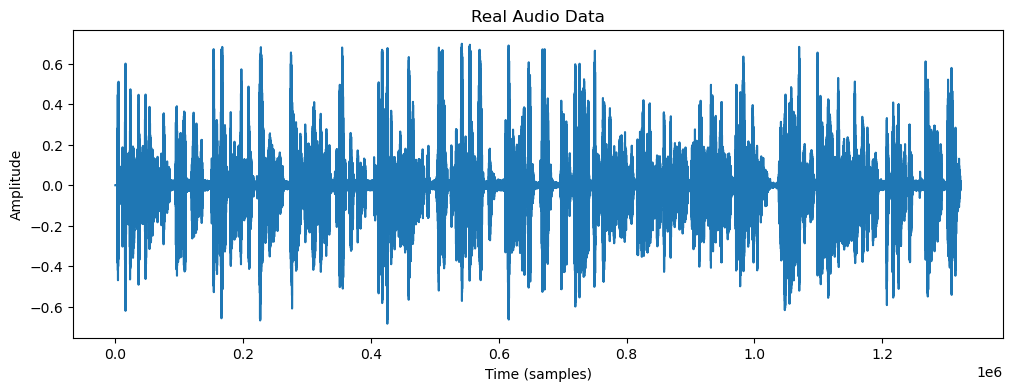

In [12]:
import librosa
import matplotlib.pyplot as plt

# Load real audio data
real_ad, real_sr = librosa.load("./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3")

# Plot the waveform of the real audio
plt.figure(figsize=(12, 4))
plt.plot(real_ad)
plt.title("Real Audio Data")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()


# Cell 7: Creating and Plotting a Spectrogram for Real Audio

- **Library Imports:**
  - `numpy` for numerical operations.
  - `librosa` for audio processing and STFT computation.
  - `librosa.display` for visualizing the spectrogram.
  - `matplotlib.pyplot` (aliased as `plt`) for plotting.

- **Loading Audio Data:**
  - Loads the real audio file from `./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3`.
  - Variables:
    - `real_ad`: Audio data.
    - `real_sr`: Sample rate of the audio.

- **Computing STFT:**
  - Uses `librosa.stft` to compute the Short-Time Fourier Transform (STFT) of the audio.
  - Takes the absolute value to get the magnitude spectrum (`real_spec`).

- **Converting to Decibels:**
  - Converts the amplitude spectrum to decibels using `librosa.amplitude_to_db` for a logarithmic scale representation (`real_spec_db`).

- **Plotting the Spectrogram:**
  - A figure of size 14x5 inches is created.
  - `librosa.display.specshow` is used to plot the spectrogram:
    - X-axis represents time.
    - Y-axis represents frequency (log scale).
  - A colorbar is added to indicate the decibel values.
  - The plot is titled "Real Audio Spectrogram" and then displayed.


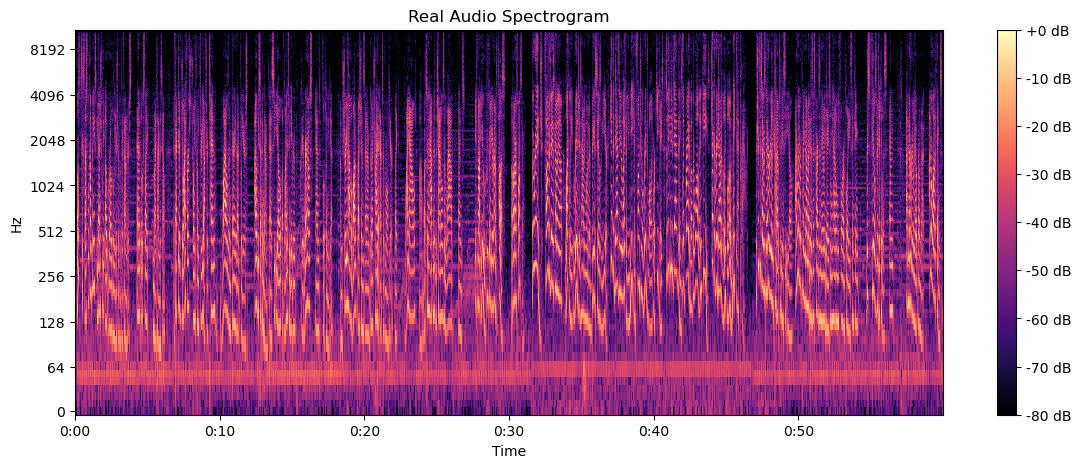

In [13]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load real audio data
real_ad, real_sr = librosa.load("./Dataset/DEMONSTRATION/DEMONSTRATION/linus-original-DEMO.mp3")

# Compute the STFT of the real audio
real_spec = np.abs(librosa.stft(real_ad))

# Convert the amplitude to dB (log scale)
real_spec_db = librosa.amplitude_to_db(real_spec, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(real_spec_db, sr=real_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Real Audio Spectrogram")
plt.show()


# Cell 8: Creating and Plotting the Mel Spectrogram for Real Audio

- **Computing the Mel Spectrogram:**
  - `librosa.feature.melspectrogram` computes the Mel-scaled spectrogram from the real audio data (`real_ad`) with the sample rate (`real_sr`).

- **Converting to Decibels:**
  - The Mel spectrogram, which represents power, is converted to a dB scale using `librosa.power_to_db`, making it easier to interpret.

- **Plotting:**
  - A figure is created with a size of 14x5 inches.
  - `librosa.display.specshow` is used to plot the Mel spectrogram:
    - **Y-axis:** Mel frequency.
    - **X-axis:** Time.
  - A title ("Real Audio Mel Spectrogram") and a colorbar (formatted to show dB values) are added.
  - The plot is displayed using `plt.show()`.


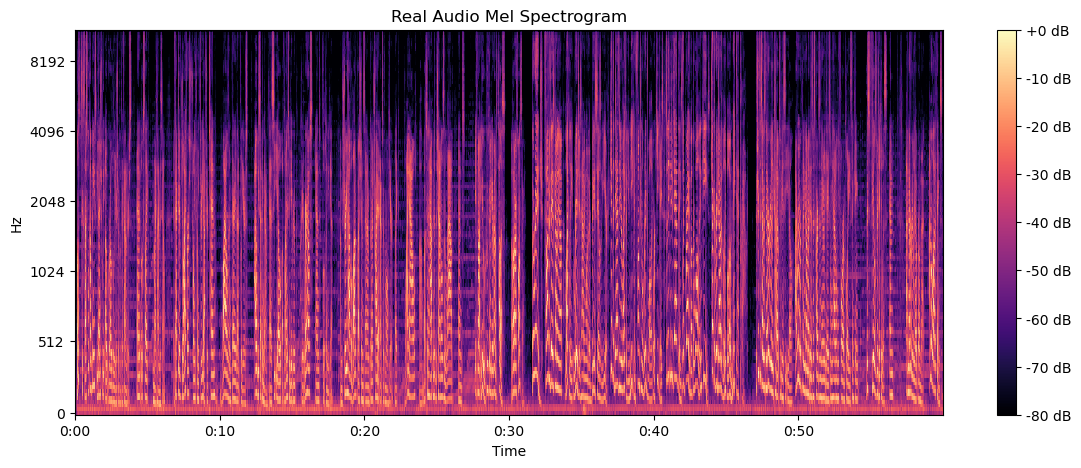

In [14]:
import librosa.display
# Compute the Mel spectrogram of the real audio
real_mel_spect = librosa.feature.melspectrogram(y=real_ad, sr=real_sr)

# Convert the Mel spectrogram to dB
real_mel_spect_db = librosa.power_to_db(real_mel_spect, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mel_spect_db, y_axis="mel", x_axis="time")
plt.title("Real Audio Mel Spectrogram")
plt.colorbar(format="%+2.0f dB")
plt.show()


# Cell 9: Computing and Plotting the Chromagram for Real Audio

- **Compute Chromagram:**
  - Uses `librosa.feature.chroma_cqt` to compute the chromagram from the real audio data (`real_ad`) with the sample rate (`real_sr`).
  - The `bins_per_octave` parameter is set to 36 to provide a detailed representation of the chromatic content.

- **Plotting the Chromagram:**
  - A figure is created with a size of 14x5 inches.
  - `librosa.display.specshow` displays the chromagram with:
    - **X-axis:** Time.
    - **Y-axis:** Chromatic pitch classes (chroma).
    - The display range is normalized between 0 and 1.
  - A colorbar is added to show intensity values.
  - The plot is titled "Real Audio Chromagram" and then displayed.


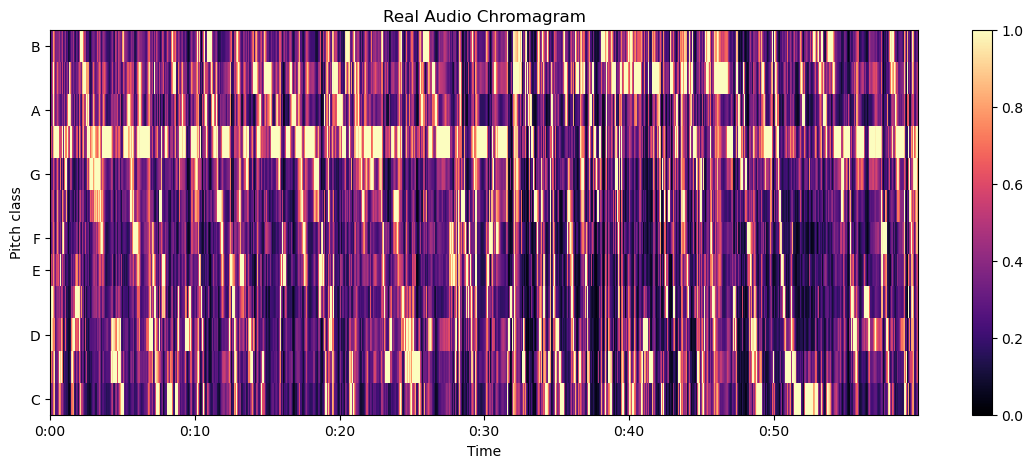

In [15]:
# Compute the chromagram using the Constant-Q Transform
real_chroma = librosa.feature.chroma_cqt(y=real_ad, sr=real_sr, bins_per_octave=36)

# Plot the chromagram
plt.figure(figsize=(14, 5))
librosa.display.specshow(real_chroma, sr=real_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Real Audio Chromagram")
plt.show()

# Cell 10: Extracting and Plotting MFCCs for Real Audio

- **Computing MFCCs:**
  - `librosa.feature.mfcc` is used to extract the Mel-Frequency Cepstral Coefficients (MFCCs) from the real audio data (`real_ad`).
  - MFCCs provide a compact representation of the audio's spectral properties, often used in speech and audio analysis.

- **Plotting the MFCCs:**
  - A figure is created with dimensions 14x5 inches.
  - The MFCCs are visualized using `librosa.display.specshow`, with the x-axis representing time.
  - A colorbar is added to indicate the scale of the coefficients.
  - The plot is titled "Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)".
  - The plot is displayed using `plt.show()`.


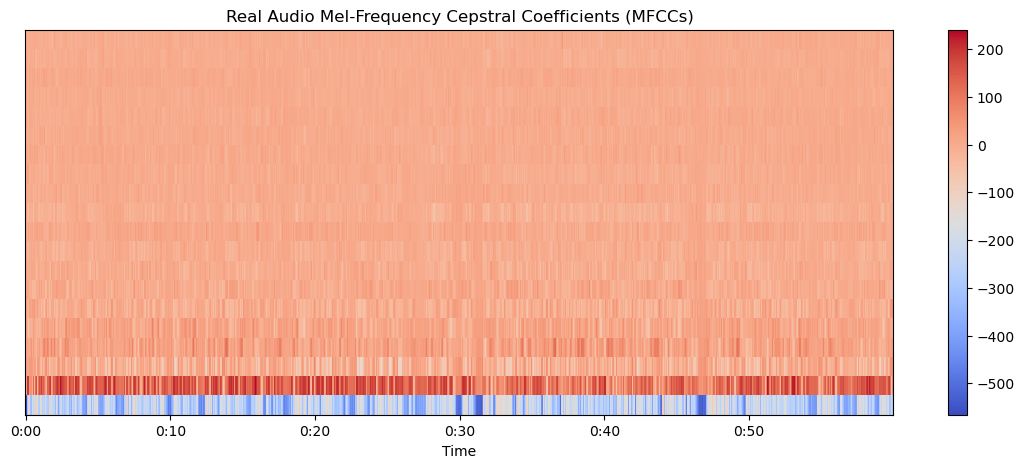

In [16]:
real_mfccs = librosa.feature.mfcc(y=real_ad, sr=real_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(real_mfccs, sr=real_sr, x_axis="time")
plt.colorbar()
plt.title("Real Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

# Cell: Plotting the Waveform of Fake Audio

- **Load Fake Audio Data:**
  - `librosa.load(fake_audio)` loads the fake audio file.
  - `fake_ad` stores the audio data and `fake_sr` stores the sample rate.

- **Plotting the Waveform:**
  - A figure is created with dimensions 12x4 inches.
  - The waveform of the fake audio is plotted.
  - The plot is titled "Fake Audio Data".
  - The plot is displayed using `plt.show()`.


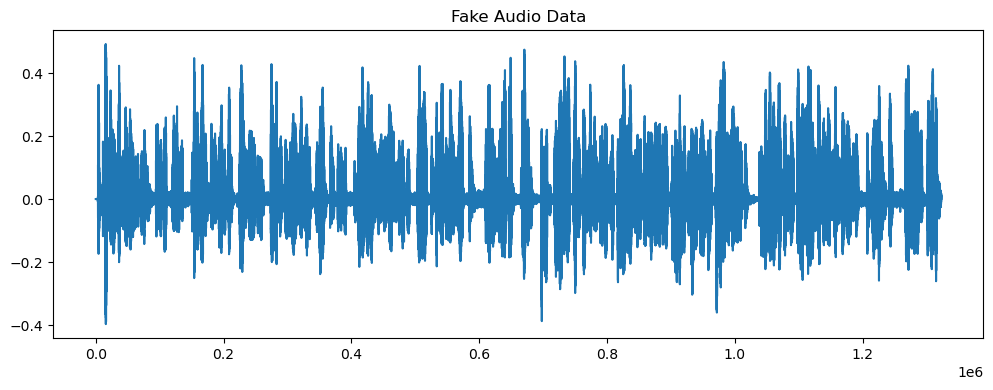

In [17]:
fake_ad, fake_sr = librosa.load(fake_audio)
plt.figure(figsize=(12, 4))
plt.plot(fake_ad)
plt.title("Fake Audio Data")
plt.show()

# Cell: Creating and Plotting the Spectrogram for Fake Audio

- **Compute STFT:**
  - Calculates the Short-Time Fourier Transform (STFT) of the fake audio (`fake_ad`) using `librosa.stft`.
  - Takes the absolute value to obtain the magnitude spectrum.

- **Convert to dB Scale:**
  - Converts the amplitude spectrogram to decibels using `librosa.amplitude_to_db` with a reference to the maximum value.

- **Plotting the Spectrogram:**
  - A figure of size 14x5 inches is created.
  - `librosa.display.specshow` is used to display the spectrogram:
    - X-axis represents time.
    - Y-axis represents frequency on a logarithmic scale.
  - A colorbar is added to display dB values.
  - The plot is titled "Fake Audio Spectogram" and displayed using `plt.show()`.


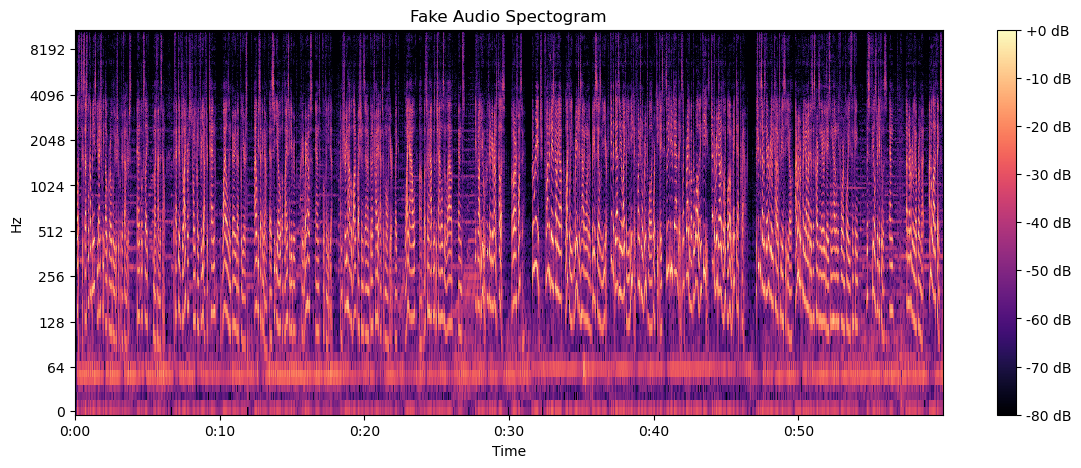

In [18]:
fake_spec = np.abs(librosa.stft(fake_ad))
fake_spec = librosa.amplitude_to_db(fake_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_spec, sr=fake_sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Fake Audio Spectogram")
plt.show()

# Cell: Creating and Plotting the Mel Spectrogram for Fake Audio

- **Compute Mel Spectrogram:**
  - The Mel spectrogram is computed from the fake audio data (`fake_ad`) using `librosa.feature.melspectrogram` with the sample rate (`fake_sr`).

- **Convert to Decibels:**
  - The power spectrogram is converted to a dB scale using `librosa.power_to_db` to better visualize the audio features.

- **Plotting the Spectrogram:**
  - A figure is created with dimensions 14x5 inches.
  - `librosa.display.specshow` is used to display the Mel spectrogram:
    - **X-axis:** Represents time.
    - **Y-axis:** Represents Mel frequency.
  - A title "Fake Audio Mel Spectogram" and a colorbar (formatted to show dB values) are added.
  - The plot is displayed with `plt.show()`.


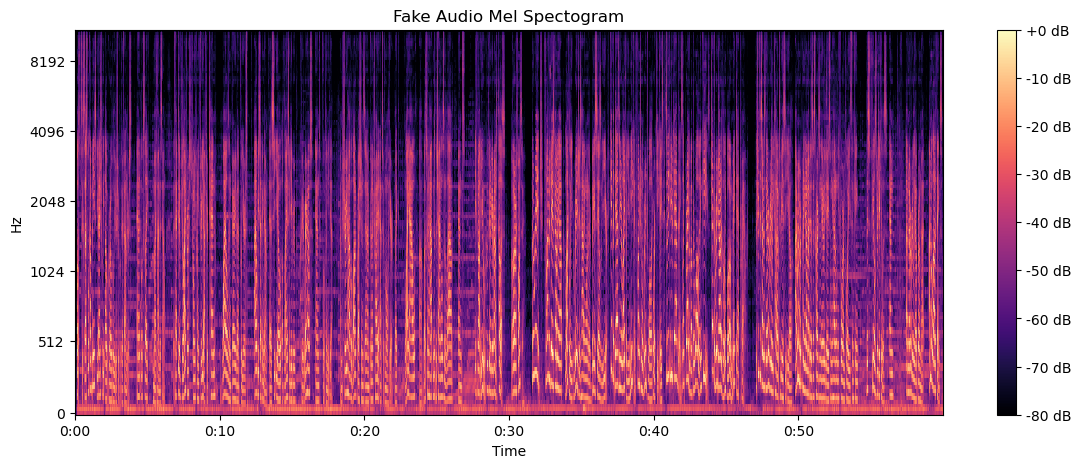

In [19]:
fake_mel_spect = librosa.feature.melspectrogram(y=fake_ad, sr=fake_sr)
fake_mel_spect = librosa.power_to_db(fake_mel_spect, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mel_spect, y_axis="mel", x_axis="time")
plt.title("Fake Audio Mel Spectogram")
plt.colorbar(format="%+2.0f dB")
plt.show()

# Cell: Creating and Plotting the Chromagram for Fake Audio

- **Compute Chromagram:**
  - The chromagram of the fake audio is computed using `librosa.feature.chroma_cqt`.
  - Inputs:
    - `y=fake_ad`: The fake audio data.
    - `sr=fake_sr`: The sample rate of the fake audio.
    - `bins_per_octave=36`: Provides a higher resolution for the chroma representation.

- **Plot Chromagram:**
  - A figure with dimensions 14x5 inches is created.
  - `librosa.display.specshow` is used to display the chromagram:
    - **X-axis:** Time.
    - **Y-axis:** Chroma (pitch classes).
    - The values are normalized between 0 and 1.
  - A colorbar is added to indicate the intensity levels.
  - The plot is titled "Fake Audio Chromagram" and is displayed using `plt.show()`.


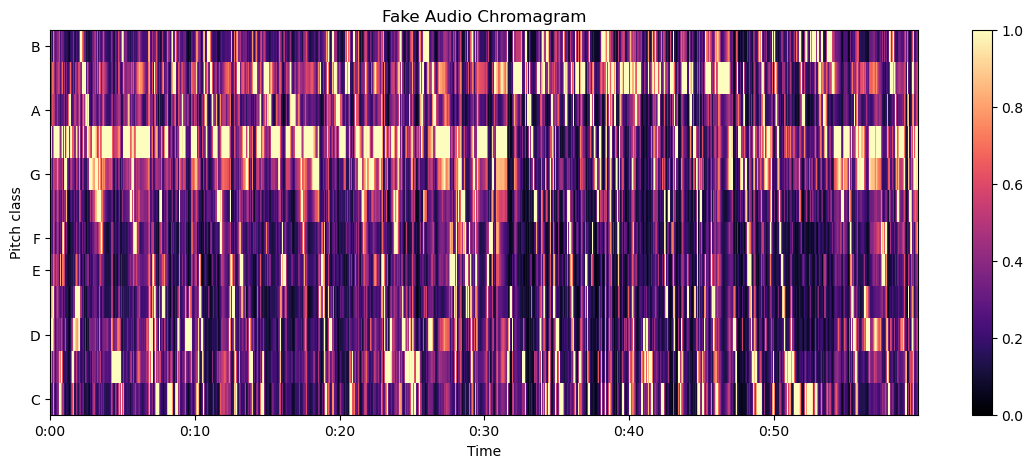

In [20]:
fake_chroma = librosa.feature.chroma_cqt(y=fake_ad, sr=fake_sr, bins_per_octave=36)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_chroma, sr=fake_sr, x_axis="time", y_axis="chroma", vmin=0, vmax=1)
plt.colorbar()
plt.title("Fake Audio Chromagram")
plt.show()

# Cell: Extracting and Plotting MFCCs for Fake Audio

- **Compute MFCCs:**
  - MFCCs are extracted from the fake audio data (`fake_ad`) using `librosa.feature.mfcc` with the sample rate (`fake_sr`).
  - MFCCs capture the essential spectral properties of the audio signal, commonly used in speech and audio analysis.

- **Plotting the MFCCs:**
  - A figure with dimensions 14x5 inches is created.
  - `librosa.display.specshow` visualizes the MFCCs with the x-axis representing time.
  - A colorbar is included to show the scale of the MFCC values.
  - The plot is titled "Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)".
  - The final visualization is displayed using `plt.show()`.


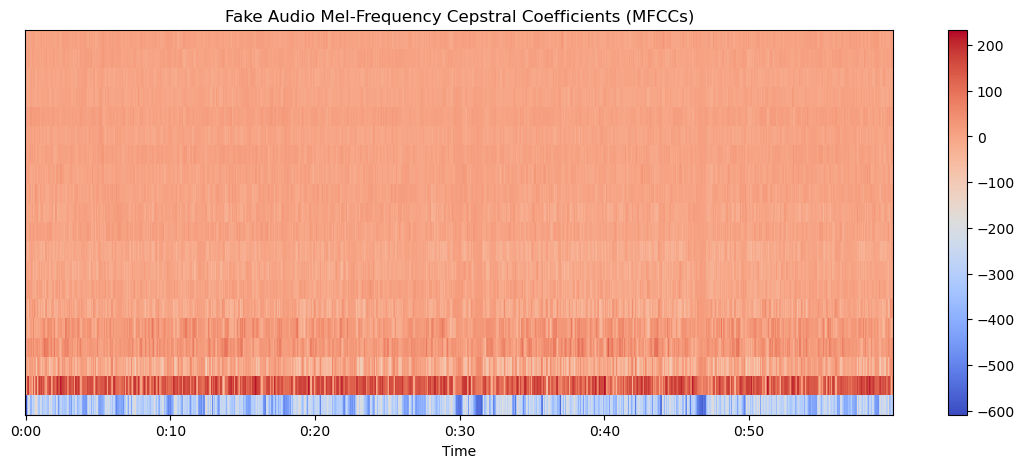

In [21]:
fake_mfccs = librosa.feature.mfcc(y=fake_ad, sr=fake_sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(fake_mfccs, sr=fake_sr, x_axis="time")
plt.colorbar()
plt.title("Fake Audio Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.show()

# Cell: Extracting MFCC Features and Creating Labels

- **Initialize Containers:**
  - `data`: An empty list to store the MFCC feature vectors.
  - `labels`: An empty list to store the corresponding labels.

- **Iterate Through Folders:**
  - Loops over each folder in `folders`, which represents subdirectories in the audio files directory.
  - Lists all files within each folder.

- **Process Each Audio File:**
  - Constructs the full file path using `os.path.join`.
  - Loads the audio file with `librosa.load`, using `res_type="kaiser_fast"` for efficient loading.
  - Extracts 40 MFCCs from the audio using `librosa.feature.mfcc`.
  - Computes the mean of the MFCCs across time, resulting in a fixed-size feature vector.
  - Appends the feature vector to the `data` list.
  - Appends the corresponding folder name as the label to the `labels` list.

This cell effectively prepares the dataset by extracting audio features and organizing them with their associated labels for further analysis or training of a machine learning model.


In [22]:
data = []
labels = []

for folder in folders:
    files = os.listdir(os.path.join(audio_files_path, folder))
    for file in tqdm(files):
        file_path = os.path.join(audio_files_path, folder, file)
        audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_features_scaled = np.mean(mfccs_features.T, axis=0)
        data.append(mfccs_features_scaled)
        labels.append(folder)

100%|██████████| 8/8 [00:23<00:00,  2.97s/it]


# Cell: Creating and Displaying the Feature DataFrame

- **Creating the DataFrame:**
  - A Pandas DataFrame `feature_df` is constructed with two columns:
    - `features`: The MFCC feature vectors extracted from the audio files.
    - `class`: The corresponding labels for each audio file (derived from the folder names).

- **Displaying the DataFrame:**
  - The `head()` method is called on `feature_df` to display the first few rows, providing a quick overview of the dataset structure.


In [38]:
feature_df = pd.DataFrame({"features": data, "class": labels})
feature_df.head()

,features,class
0,"[-260.1085, 100.856926, -25.453161, -0.2690359...",FAKE
1,"[-258.9036, 93.914345, -27.627077, -1.9326234,...",FAKE
2,"[-268.50894, 118.533066, -38.89298, 13.812951,...",FAKE
3,"[-272.68378, 101.50515, -22.251564, 4.101077, ...",FAKE
4,"[-254.73932, 66.81036, -33.194874, -4.094302, ...",FAKE


# Cell: Encoding Labels and Preparing Data Arrays

- **Display Class Distribution:**
  - `feature_df["class"].value_counts()` prints the frequency of each class label in the dataset.

- **Label Encoding Function:**
  - A function `label_encoder` is defined to:
    - Fit a `LabelEncoder` to a given column.
    - Print the column name and unique classes.
    - Transform the categorical labels into numerical values.
    
- **Encode the 'class' Column:**
  - The `"class"` column in `feature_df` is replaced with its encoded numerical values by applying `label_encoder`.

- **Inspect Updated DataFrame:**
  - `feature_df.head()` is used to display the first few rows of the DataFrame after encoding.

- **Prepare Feature and Label Arrays:**
  - `X` is created by converting the list of feature vectors from the `"features"` column into a NumPy array.
  - `y` is similarly created from the encoded `"class"` column.


In [39]:
feature_df["class"].value_counts()
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)
feature_df["class"] = label_encoder(feature_df["class"])
feature_df.head()

X = np.array(feature_df["features"].tolist())
y = np.array(feature_df["class"].tolist())

class ['FAKE' 'REAL']


# Cell: Data Balancing, Preprocessing, and Splitting

- **Oversampling to Balance the Dataset:**
  - A `RandomOverSampler` is instantiated with `random_state=42` to ensure reproducibility.
  - The dataset is balanced by oversampling the minority classes using `ros.fit_resample(X, y)`, which returns:
    - `X_resampled`: The resampled features.
    - `y_resampled`: The resampled labels.

- **One-Hot Encoding Labels:**
  - The resampled labels (`y_resampled`) are converted to one-hot encoding using `to_categorical`. This format is commonly used in multi-class classification.

- **Splitting the Data:**
  - The resampled features and labels are split into training and testing sets using `train_test_split`:
    - `test_size=0.2` sets aside 20% of the data for testing.
    - `random_state=42` is used for reproducibility.

- **Determining Model Parameters:**
  - **Number of Labels:**  
    - Calculated using `len(feature_df["class"].unique())`, which counts the unique classes in the original DataFrame.
  - **Input Shape:**  
    - Extracted from the shape of the first feature vector (`feature_df["features"][0].shape`), which will be used as the input dimension for the model.


In [40]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
y_resampled = to_categorical(y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
num_labels = len(feature_df["class"].unique())
num_labels
input_shape = feature_df["features"][0].shape
input_shape

/opt/anaconda3/envs/Arsh/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/Arsh/lib/python3.10/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/envs/Arsh/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


(40,)

# Cell: Building the Neural Network Model

- **Model Initialization:**
  - A Sequential model is created using Keras.

- **First Dense Block:**
  - **Dense Layer:** 128 neurons with the input shape specified by `input_shape`.
  - **Activation:** ReLU is applied to introduce non-linearity.
  - **Dropout:** A dropout rate of 50% is applied to prevent overfitting.

- **Second Dense Block:**
  - **Dense Layer:** 256 neurons.
  - **Activation:** ReLU activation function.
  - **Dropout:** 50% dropout rate.

- **Third Dense Block:**
  - **Dense Layer:** 128 neurons.
  - **Activation:** ReLU activation function.
  - **Dropout:** 50% dropout rate.

- **Output Layer:**
  - **Dense Layer:** Number of neurons equal to `num_labels` (number of classes).
  - **Activation:** Softmax activation is used to output probability distributions for multi-class classification.


In [41]:
model = Sequential()
model.add(Dense(128, input_shape=input_shape))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation(activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_labels))
model.add(Activation(activation="softmax"))

# Cell: Compiling and Summarizing the Model

- **Compiling the Model:**
  - **Loss Function:**  
    - `categorical_crossentropy` is used, which is suited for multi-class classification.
  - **Optimizer:**  
    - `adam` optimizer is chosen for its efficiency in training deep learning models.
  - **Metrics:**  
    - The model tracks `accuracy` during training.

- **Model Summary:**
  - `model.summary()` is called to print a detailed summary of the model architecture, including:
    - The layers used.
    - The shape of the outputs at each layer.
    - The total number of trainable parameters.


In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5248      
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Cell: Training the Model with Early Stopping

- **Early Stopping:**
  - An `EarlyStopping` callback is set up to monitor `"val_loss"`.
  - `patience=10` ensures that training stops if the validation loss doesn't improve for 10 consecutive epochs.

- **Model Training:**
  - The model is trained using `model.fit()` with:
    - **Training Data:** `X_train` and `y_train`.
    - **Validation Data:** `X_test` and `y_test`.
    - **Batch Size:** 2 samples per batch.
    - **Epochs:** A maximum of 500 epochs.
    - **Callbacks:** Early stopping is applied to prevent overfitting by stopping training if validation loss does not improve.


In [43]:
early = EarlyStopping(monitor="val_loss", patience=10)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=2, epochs=500 , callbacks=[early])


Epoch 1/500
45/45 [==============================] - 0s 2ms/step - loss: 21.1426 - accuracy: 0.5281 - val_loss: 2.6912 - val_accuracy: 0.6522
Epoch 2/500
45/45 [==============================] - 0s 907us/step - loss: 15.4179 - accuracy: 0.5730 - val_loss: 7.9231 - val_accuracy: 0.3478
Epoch 3/500
45/45 [==============================] - 0s 879us/step - loss: 16.8526 - accuracy: 0.5169 - val_loss: 0.6372 - val_accuracy: 0.7391
Epoch 4/500
45/45 [==============================] - 0s 862us/step - loss: 9.6483 - accuracy: 0.5056 - val_loss: 4.9846 - val_accuracy: 0.6522
Epoch 5/500
45/45 [==============================] - 0s 909us/step - loss: 11.9916 - accuracy: 0.4719 - val_loss: 0.5145 - val_accuracy: 0.6957
Epoch 6/500
45/45 [==============================] - 0s 888us/step - loss: 7.5967 - accuracy: 0.4944 - val_loss: 3.6397 - val_accuracy: 0.3478
Epoch 7/500
45/45 [==============================] - 0s 875us/step - loss: 8.9379 - accuracy: 0.5056 - val_loss: 0.7162 - val_accuracy: 0.47

# Cell: Evaluating the Model

- **Evaluation:**
  - The model is evaluated on the test set using `model.evaluate(X_test, y_test)`.
  - This returns the test loss (`test_loss`) and test accuracy (`test_acc`).

- **Output:**
  - The test loss and accuracy are printed to provide a measure of the model's performance on unseen data.


In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 15ms/step - loss: 0.7575 - accuracy: 0.2609
Test Loss: 0.7574567198753357
Test Accuracy: 0.260869562625885


# Cell: Plotting Model Accuracy and Loss

### Plotting Model Accuracy
- A new figure is created and titled "Model Accuracy".
- The training accuracy (`history.history["accuracy"]`) is plotted.
- The validation accuracy (`history.history["val_accuracy"]`) is plotted.
- A legend is added to distinguish between the training and validation curves.
- The y-axis is set to a range of [0, 1] for better visualization.
- The plot is displayed using `plt.show()`.

### Plotting Model Loss
- Another figure is created with the title "Model Loss".
- The training loss (`history.history["loss"]`) is plotted.
- The validation loss (`history.history["val_loss"]`) is plotted.
- A legend is added to differentiate between training and validation loss.
- The y-axis is limited to [0, 1] for consistency.
- The plot is displayed using `plt.show()`.


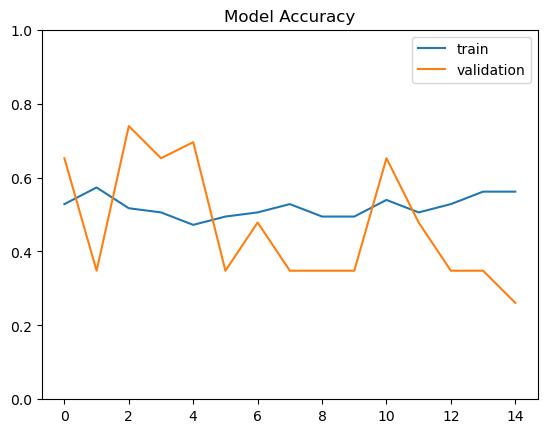

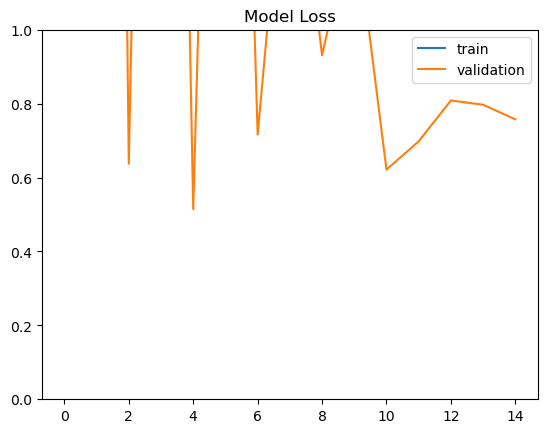

In [51]:
plt.figure()
plt.title("Model Accuracy")
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

plt.figure()
plt.title("Model Loss")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.ylim([0, 1])
plt.show()

# Cell: Detecting Fake Audio

This function, `detect_fake(filename)`, processes an audio file and classifies it as either "FAKE" or "REAL".

## Steps:
1. **Load Audio File:**
   - The audio file is loaded using `librosa.load` with the `kaiser_fast` resampling method.
   - Returns the audio signal (`sound_signal`) and its sample rate (`sample_rate`).

2. **Extract MFCC Features:**
   - Computes 40 MFCCs using `librosa.feature.mfcc`.
   - Averages the MFCC features over time (across frames) to generate a fixed-size feature vector.
   - Reshapes the feature vector to match the model's expected input shape.

3. **Prediction:**
   - The pre-trained model predicts the class probabilities for the processed features.
   - The raw prediction array is printed.

4. **Interpretation of Results:**
   - The predicted class is determined using `np.argmax` to find the index with the highest probability.
   - The index is mapped to the corresponding label: "FAKE" or "REAL".
   - The final classification result is printed.


In [55]:
def detect_fake(filename):
    sound_signal, sample_rate = librosa.load(filename, res_type="kaiser_fast")
    mfcc_features = librosa.feature.mfcc(y=sound_signal, sr=sample_rate, n_mfcc=40)
    mfccs_features_scaled = np.mean(mfcc_features.T, axis=0)
    mfccs_features_scaled = mfccs_features_scaled.reshape(1, -1)
    result_array = model.predict(mfccs_features_scaled)
    print(result_array)
    result_classes = ["FAKE", "REAL"]
    result = np.argmax(result_array[0])
    print("Result:", result_classes[result])
# Local paths for the test real and fake audio files
test_real = "./Dataset/KAGGLE/AUDIO/REAL/your_real_audio_file.wav"
test_fake = "./Dataset/KAGGLE/AUDIO/FAKE/your_fake_audio_file.wav"

In [56]:
detect_fake(test_real)

/var/folders/fw/y64qmm0n3g36fd5hs00npdyw0000gn/T/ipykernel_35842/3159078847.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  sound_signal, sample_rate = librosa.load(filename, res_type="kaiser_fast")


FileNotFoundError: [Errno 2] No such file or directory: './Dataset/KAGGLE/AUDIO/REAL/your_real_audio_file.wav'

In [ ]:
detect_fake(test_fake)